In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
df=pd.read_csv('./train.csv')
from tensorflow.keras import datasets, layers, models
import os
from os import listdir
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models
import glob
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score

In [3]:
predList=[]
test=pd.read_csv('test.csv')
test=test[:150]

In [8]:


for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in test.image_name:
        img = image.load_img("train/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==150):
            break
    test['labels '+str(modelName)]=predList

In [9]:
test
test.to_csv("test_results_t.csv")

In [4]:
test2=pd.read_csv('test_results_t(2).csv')
test2

,Unnamed: 0,image_name,UserClassification,Mode,labels inception,labels inceptionZoom30,labels inceptionZoom30shear30,labels inceptionZoom45,labels ResNet50,labels ResNet50PrePro,labels ResNet50Zoom30,labels ResNet50Zoom45,labels ResNet50Zoom4Shear30,labels ResNetReluDropout,labels vgg16,labels vgg16-2,labels vgg16ZoomRange45,labels vgg16ZoomRange45-2,labels vgg19,labels vgg19Zoom45
0,0,3.jpg,5,1,1,0,1,1,1,5,0,0,0,1,4,5,1,5,5,0
1,1,5.jpg,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0
2,2,6.jpg,4,1,1,4,1,1,1,4,0,0,0,1,2,2,2,2,4,4
3,3,11.jpg,2,2,1,0,1,1,0,3,0,0,0,1,2,2,2,2,2,2
4,4,14.jpg,5,0,1,0,1,1,1,5,0,0,0,1,0,5,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,494.jpg,2,4,1,0,1,1,1,5,0,0,0,1,4,4,4,4,4,4
146,146,497.jpg,5,0,1,0,1,1,2,5,0,0,0,1,0,0,0,0,0,0
147,147,498.jpg,3,2,1,0,1,1,1,2,0,0,0,1,2,0,2,2,2,2
148,148,499.jpg,3,2,1,0,1,2,1,2,0,0,0,1,2,2,2,2,2,2


In [5]:

acc=accuracy_score(test2['Mode'],test2['UserClassification'])
print( "Mode: " +str(acc))
for modelName in os.listdir('saved_model_t'):
        label='labels '+str(modelName)
        acc=accuracy_score(test2[label],test2['UserClassification'])
        print(modelName+ ": " +str(acc))

Mode: 0.42
inception: 0.11333333333333333
inceptionZoom30: 0.10666666666666667
inceptionZoom30shear30: 0.08666666666666667
inceptionZoom45: 0.05333333333333334
ResNet50: 0.21333333333333335
ResNet50PrePro: 0.6866666666666666
ResNet50Zoom30: 0.14
ResNet50Zoom45: 0.14
ResNet50Zoom4Shear30: 0.14
ResNetReluDropout: 0.14
vgg16: 0.5333333333333333
vgg16-2: 0.6
vgg16ZoomRange45: 0.54
vgg16ZoomRange45-2: 0.56
vgg19: 0.5466666666666666
vgg19Zoom45: 0.47333333333333333


# Test without Montains or Glaciers

In [6]:

test2 = test2[test2['UserClassification']!= 2]
test2 = test2[test2['UserClassification']!= 3]
test2
acc=accuracy_score(test2['Mode'],test2['UserClassification'])
for modelName in os.listdir('saved_model_t'):
        label='labels '+str(modelName)
        acc=accuracy_score(test2[label],test2['UserClassification'])
        print(modelName+ ": " +str(acc))

inception: 0.18181818181818182
inceptionZoom30: 0.18181818181818182
inceptionZoom30shear30: 0.125
inceptionZoom45: 0.06818181818181818
ResNet50: 0.2727272727272727
ResNet50PrePro: 0.875
ResNet50Zoom30: 0.23863636363636365
ResNet50Zoom45: 0.23863636363636365
ResNet50Zoom4Shear30: 0.23863636363636365
ResNetReluDropout: 0.23863636363636365
vgg16: 0.5795454545454546
vgg16-2: 0.7045454545454546
vgg16ZoomRange45: 0.5795454545454546
vgg16ZoomRange45-2: 0.6022727272727273
vgg19: 0.6363636363636364
vgg19Zoom45: 0.5227272727272727


# Isolation of building images Test


In [7]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Buildings'):
        img = image.load_img("Buildings/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==29):
            break
    zeros=np.zeros(29)
    print(str(modelName)+ ": " + str(accuracy_score(zeros,predList)))

inception: 0.27586206896551724
inceptionZoom30: 0.7586206896551724
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.0
ResNet50: 0.3793103448275862
ResNet50PrePro: 0.8620689655172413
ResNet50Zoom30: 1.0
ResNet50Zoom45: 1.0
ResNet50Zoom4Shear30: 1.0
ResNetReluDropout: 0.0
vgg16: 0.9655172413793104
vgg16-2: 0.9655172413793104
vgg16ZoomRange45: 0.9655172413793104
vgg16ZoomRange45-2: 0.9655172413793104
vgg19: 0.9310344827586207
vgg19Zoom45: 1.0


# Test with forest images

In [8]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Forest'):
        img = image.load_img("Forest/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==27):
            break
    ones=np.ones(27)
    print(str(modelName)+ ": " + str(accuracy_score(ones,predList)))

inception: 0.4074074074074074
inceptionZoom30: 0.07407407407407407
inceptionZoom30shear30: 0.6666666666666666
inceptionZoom45: 0.4074074074074074
ResNet50: 0.5185185185185185
ResNet50PrePro: 0.8888888888888888
ResNet50Zoom30: 0.0
ResNet50Zoom45: 0.0
ResNet50Zoom4Shear30: 0.0
ResNetReluDropout: 1.0
vgg16: 0.8518518518518519
vgg16-2: 0.8518518518518519
vgg16ZoomRange45: 0.8148148148148148
vgg16ZoomRange45-2: 0.8518518518518519
vgg19: 0.8148148148148148
vgg19Zoom45: 0.7037037037037037


In [9]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Mountains'):
        img = image.load_img("Mountains/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==22):
            break
    twos=np.full((22),2)
    print(str(modelName)+ ": " + str(accuracy_score(twos,predList)))

inception: 0.0
inceptionZoom30: 0.09090909090909091
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.22727272727272727
ResNet50: 0.18181818181818182
ResNet50PrePro: 0.22727272727272727
ResNet50Zoom30: 0.0
ResNet50Zoom45: 0.0
ResNet50Zoom4Shear30: 0.0
ResNetReluDropout: 0.0
vgg16: 0.5909090909090909
vgg16-2: 0.3181818181818182
vgg16ZoomRange45: 0.5909090909090909
vgg16ZoomRange45-2: 0.5909090909090909
vgg19: 0.13636363636363635
vgg19Zoom45: 0.36363636363636365


In [10]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Glacier'):
        img = image.load_img("Glacier/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==25):
            break
    threes=np.full((25),2)
    print(str(modelName)+ ": " + str(accuracy_score(threes,predList)))

inception: 0.0
inceptionZoom30: 0.04
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.24
ResNet50: 0.04
ResNet50PrePro: 0.44
ResNet50Zoom30: 0.0
ResNet50Zoom45: 0.0
ResNet50Zoom4Shear30: 0.0
ResNetReluDropout: 0.0
vgg16: 0.6
vgg16-2: 0.6
vgg16ZoomRange45: 0.8
vgg16ZoomRange45-2: 0.6
vgg19: 0.52
vgg19Zoom45: 0.44


In [11]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Mountains'):
        img = image.load_img("Mountains/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        if(pred.argmax()==3 or pred.argmax()==2):
            predList.append(3)
        else:
            predList.append(pred.argmax())
        count+=1
        if(count==22):
            break
    threes=np.full((22),3)
    print(str(modelName)+ ": " + str(accuracy_score(threes,predList)))

inception: 0.0
inceptionZoom30: 0.09090909090909091
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.22727272727272727
ResNet50: 0.18181818181818182
ResNet50PrePro: 0.7272727272727273
ResNet50Zoom30: 0.0
ResNet50Zoom45: 0.0
ResNet50Zoom4Shear30: 0.0
ResNetReluDropout: 0.0
vgg16: 0.5909090909090909
vgg16-2: 0.5454545454545454
vgg16ZoomRange45: 0.6363636363636364
vgg16ZoomRange45-2: 0.6818181818181818
vgg19: 0.6363636363636364
vgg19Zoom45: 0.36363636363636365


In [12]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Sea'):
        img = image.load_img("Sea/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==27):
            break
    fours=np.full((27),4)
    print(str(modelName)+ ": " + str(accuracy_score(fours,predList)))

inception: 0.0
inceptionZoom30: 0.037037037037037035
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.0
ResNet50: 0.037037037037037035
ResNet50PrePro: 0.7037037037037037
ResNet50Zoom30: 0.0
ResNet50Zoom45: 0.0
ResNet50Zoom4Shear30: 0.0
ResNetReluDropout: 0.0
vgg16: 0.4444444444444444
vgg16-2: 0.5925925925925926
vgg16ZoomRange45: 0.37037037037037035
vgg16ZoomRange45-2: 0.25925925925925924
vgg19: 0.6296296296296297
vgg19Zoom45: 0.37037037037037035


In [13]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Street'):
        img = image.load_img("Street/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        predList.append(pred.argmax())
        count+=1
        if(count==28):
            break
    fives=np.full((28),5)
    print(str(modelName)+ ": " + str(accuracy_score(fives,predList)))

inception: 0.0
inceptionZoom30: 0.0
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.0
ResNet50: 0.10714285714285714
ResNet50PrePro: 0.7857142857142857
ResNet50Zoom30: 0.0
ResNet50Zoom45: 0.0
ResNet50Zoom4Shear30: 0.0
ResNetReluDropout: 0.0
vgg16: 0.0
vgg16-2: 0.35714285714285715
vgg16ZoomRange45: 0.03571428571428571
vgg16ZoomRange45-2: 0.2857142857142857
vgg19: 0.2857142857142857
vgg19Zoom45: 0.0


# using street dataset allowing the models to correct if classified as Street Or building

In [14]:

for modelName in os.listdir('saved_model_t'):
    predList=[]
    count=0
    model=models.load_model('saved_model_t/'+str(modelName))
    for filename in os.listdir('Street'):
        img = image.load_img("Street/" +str(filename), target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred=model.predict(x)
        if(pred.argmax()==0 or pred.argmax()==5):
            predList.append(5)
        else:
            predList.append(pred.argmax())
        count+=1
        if(count==28):
            break
    fives=np.full((28),5)
    print(str(modelName)+ ": " + str(accuracy_score(fives,predList)))

inception: 0.32142857142857145
inceptionZoom30: 0.6785714285714286
inceptionZoom30shear30: 0.0
inceptionZoom45: 0.03571428571428571
ResNet50: 0.6071428571428571
ResNet50PrePro: 0.8928571428571429
ResNet50Zoom30: 1.0
ResNet50Zoom45: 1.0
ResNet50Zoom4Shear30: 1.0
ResNetReluDropout: 0.0
vgg16: 0.8928571428571429
vgg16-2: 0.8928571428571429
vgg16ZoomRange45: 0.9285714285714286
vgg16ZoomRange45-2: 0.9642857142857143
vgg19: 0.9642857142857143
vgg19Zoom45: 1.0


Based on these results alone it looks as if resnet50 is performing great, but if you look at the test_results_t you can see that all of the resnet models always classifed as 0 so this is misleading so it seems the best is the vgg16 models which has been seen so far in other tests

In [15]:
test2=pd.read_csv('test_results_t(2).csv')
test2

,Unnamed: 0,image_name,UserClassification,Mode,labels inception,labels inceptionZoom30,labels inceptionZoom30shear30,labels inceptionZoom45,labels ResNet50,labels ResNet50PrePro,labels ResNet50Zoom30,labels ResNet50Zoom45,labels ResNet50Zoom4Shear30,labels ResNetReluDropout,labels vgg16,labels vgg16-2,labels vgg16ZoomRange45,labels vgg16ZoomRange45-2,labels vgg19,labels vgg19Zoom45
0,0,3.jpg,5,1,1,0,1,1,1,5,0,0,0,1,4,5,1,5,5,0
1,1,5.jpg,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0
2,2,6.jpg,4,1,1,4,1,1,1,4,0,0,0,1,2,2,2,2,4,4
3,3,11.jpg,2,2,1,0,1,1,0,3,0,0,0,1,2,2,2,2,2,2
4,4,14.jpg,5,0,1,0,1,1,1,5,0,0,0,1,0,5,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,494.jpg,2,4,1,0,1,1,1,5,0,0,0,1,4,4,4,4,4,4
146,146,497.jpg,5,0,1,0,1,1,2,5,0,0,0,1,0,0,0,0,0,0
147,147,498.jpg,3,2,1,0,1,1,1,2,0,0,0,1,2,0,2,2,2,2
148,148,499.jpg,3,2,1,0,1,2,1,2,0,0,0,1,2,2,2,2,2,2


In [16]:
test2['UserClassification'].replace(5,0,inplace=True)
test2['UserClassification'].replace(3,2,inplace=True)
test2

,Unnamed: 0,image_name,UserClassification,Mode,labels inception,labels inceptionZoom30,labels inceptionZoom30shear30,labels inceptionZoom45,labels ResNet50,labels ResNet50PrePro,labels ResNet50Zoom30,labels ResNet50Zoom45,labels ResNet50Zoom4Shear30,labels ResNetReluDropout,labels vgg16,labels vgg16-2,labels vgg16ZoomRange45,labels vgg16ZoomRange45-2,labels vgg19,labels vgg19Zoom45
0,0,3.jpg,0,1,1,0,1,1,1,5,0,0,0,1,4,5,1,5,5,0
1,1,5.jpg,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0
2,2,6.jpg,4,1,1,4,1,1,1,4,0,0,0,1,2,2,2,2,4,4
3,3,11.jpg,2,2,1,0,1,1,0,3,0,0,0,1,2,2,2,2,2,2
4,4,14.jpg,0,0,1,0,1,1,1,5,0,0,0,1,0,5,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,494.jpg,2,4,1,0,1,1,1,5,0,0,0,1,4,4,4,4,4,4
146,146,497.jpg,0,0,1,0,1,1,2,5,0,0,0,1,0,0,0,0,0,0
147,147,498.jpg,2,2,1,0,1,1,1,2,0,0,0,1,2,0,2,2,2,2
148,148,499.jpg,2,2,1,0,1,2,1,2,0,0,0,1,2,2,2,2,2,2


In [17]:
test2['Mode'].replace(3,2)
test2['Mode'].replace(5,0)
for modelName in os.listdir('saved_model_t'):
        label='labels '+str(modelName)
        test2[label].replace(3,2,inplace=True)
        test2[label].replace(5,0,inplace=True)
test2[:50]


,Unnamed: 0,image_name,UserClassification,Mode,labels inception,labels inceptionZoom30,labels inceptionZoom30shear30,labels inceptionZoom45,labels ResNet50,labels ResNet50PrePro,labels ResNet50Zoom30,labels ResNet50Zoom45,labels ResNet50Zoom4Shear30,labels ResNetReluDropout,labels vgg16,labels vgg16-2,labels vgg16ZoomRange45,labels vgg16ZoomRange45-2,labels vgg19,labels vgg19Zoom45
0,0,3.jpg,0,1,1,0,1,1,1,0,0,0,0,1,4,0,1,0,0,0
1,1,5.jpg,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0
2,2,6.jpg,4,1,1,4,1,1,1,4,0,0,0,1,2,2,2,2,4,4
3,3,11.jpg,2,2,1,0,1,1,0,2,0,0,0,1,2,2,2,2,2,2
4,4,14.jpg,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0
5,5,22.jpg,1,1,0,0,1,4,1,1,0,0,0,1,1,1,1,1,1,1
6,6,25.jpg,4,0,1,0,1,1,4,4,0,0,0,1,0,4,4,0,2,0
7,7,28.jpg,2,0,1,0,1,1,1,2,0,0,0,1,0,2,2,2,2,0
8,8,30.jpg,2,0,1,0,1,1,0,2,0,0,0,1,0,0,0,0,2,0
9,9,38.jpg,2,2,1,1,1,1,0,2,0,0,0,1,2,2,2,2,2,2


# Test after combining Mountains and Glaciers and buildings and streets

In [18]:
acc=accuracy_score(test2['Mode'],test2['UserClassification'])
print( "Mode: " +str(acc))
modelnames=[]
alpha="abcdefghijklmnopqrstuvwxyz"
accuracy=[]
count=0
for modelName in os.listdir('saved_model_t'):
        label='labels '+str(modelName)
        acc=accuracy_score(test2[label],test2['UserClassification'])
        print(str(alpha[count])+str(modelName)+ ": " +str(acc))
        modelnames.append(alpha[count])
        accuracy.append(acc)
        count+=1

Mode: 0.6666666666666666
ainception: 0.14666666666666667
binceptionZoom30: 0.22
cinceptionZoom30shear30: 0.09333333333333334
dinceptionZoom45: 0.06
eResNet50: 0.3
fResNet50PrePro: 0.8866666666666667
gResNet50Zoom30: 0.28
hResNet50Zoom45: 0.28
iResNet50Zoom4Shear30: 0.28
jResNetReluDropout: 0.14
kvgg16: 0.84
lvgg16-2: 0.8733333333333333
mvgg16ZoomRange45: 0.86
nvgg16ZoomRange45-2: 0.82
ovgg19: 0.8333333333333334
pvgg19Zoom45: 0.7666666666666667


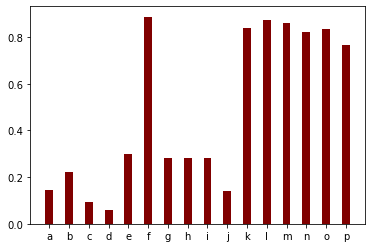

In [19]:
plt.bar(modelnames, accuracy, color ='maroon',
        width = 0.4)
plt.show()